In [63]:
import pandas as pd

# Dados fornecidos
data = {
    "Model": ["ANN_P", "ANN_P", "ANN_P", "ANN_P", "ANN_M", "ANN_M", "ANN_M", "ANN_M",
              "SVM", "SVM", "SVM", "SVM", "RF", "RF", "RF", "RF"],
    "Component": ["H2", "CO", "CO2", "CH4", "H2", "CO", "CO2", "CH4",
                 "H2", "CO", "CO2", "CH4", "H2", "CO", "CO2", "CH4"],
    "R²_Train": [0.97, 0.93, 0.96, 0.83, 0.98, 0.89, 0.93, 0.91,
                 0.94, 0.83, 0.94, 0.81, 0.97, 0.9229, 0.9687, 0.8595],
    "R²_Test": [0.79, 0.51, 0.77, 0.63, 0.91, 0.70, 0.81, 0.86,
                0.86, 0.62, 0.79, 0.70, 0.89, 0.7193, 0.8703, 0.6856],
    "R²_Validation": [0.86, 0.55, 0.72, 0.81, 0.20, 0.00, 0.02, 0.19,
                      0.88, 0.78, 0.85, 0.81, 0.90, 0.7455, 0.8830, 0.8792],
    "SSE_Train": [3612.74, 2243.96, 1688.13, 1105.85, 0.29, 0.67, 2.65300, 7.625400,
                  7289.03, 5198.58, 2584.22, 1250.66, 3834.01, 2410.76, 1316.11, 944.429],
    "SSE_Test": [5916.78, 4428.77, 2093.50, 514127.00, 1110.00, 8370.00, 252.6077, 371.667,
                 4506.35, 3831.20, 2138.99, 4588.18, 3294.37, 2825.21, 1315.59, 488.84],
    "SSE_Validation": [3930.84, 3672.44, 3044.11, 261.220, 242000.00, 134000.00, 154000.00, 2.9994,
                       3642.46, 1943.58, 1825.93, 2877.70, 3107.72, 2280.76, 1379.62, 182.02]
}

# Criar DataFrame
df = pd.DataFrame(data)

# Exibir as primeiras linhas para verificação
print(df.head())

   Model Component  R²_Train  R²_Test  R²_Validation  SSE_Train   SSE_Test  \
0  ANN_P        H2      0.97     0.79           0.86    3612.74    5916.78   
1  ANN_P        CO      0.93     0.51           0.55    2243.96    4428.77   
2  ANN_P       CO2      0.96     0.77           0.72    1688.13    2093.50   
3  ANN_P       CH4      0.83     0.63           0.81    1105.85  514127.00   
4  ANN_M        H2      0.98     0.91           0.20       0.29    1110.00   

   SSE_Validation  
0         3930.84  
1         3672.44  
2         3044.11  
3          261.22  
4       242000.00  


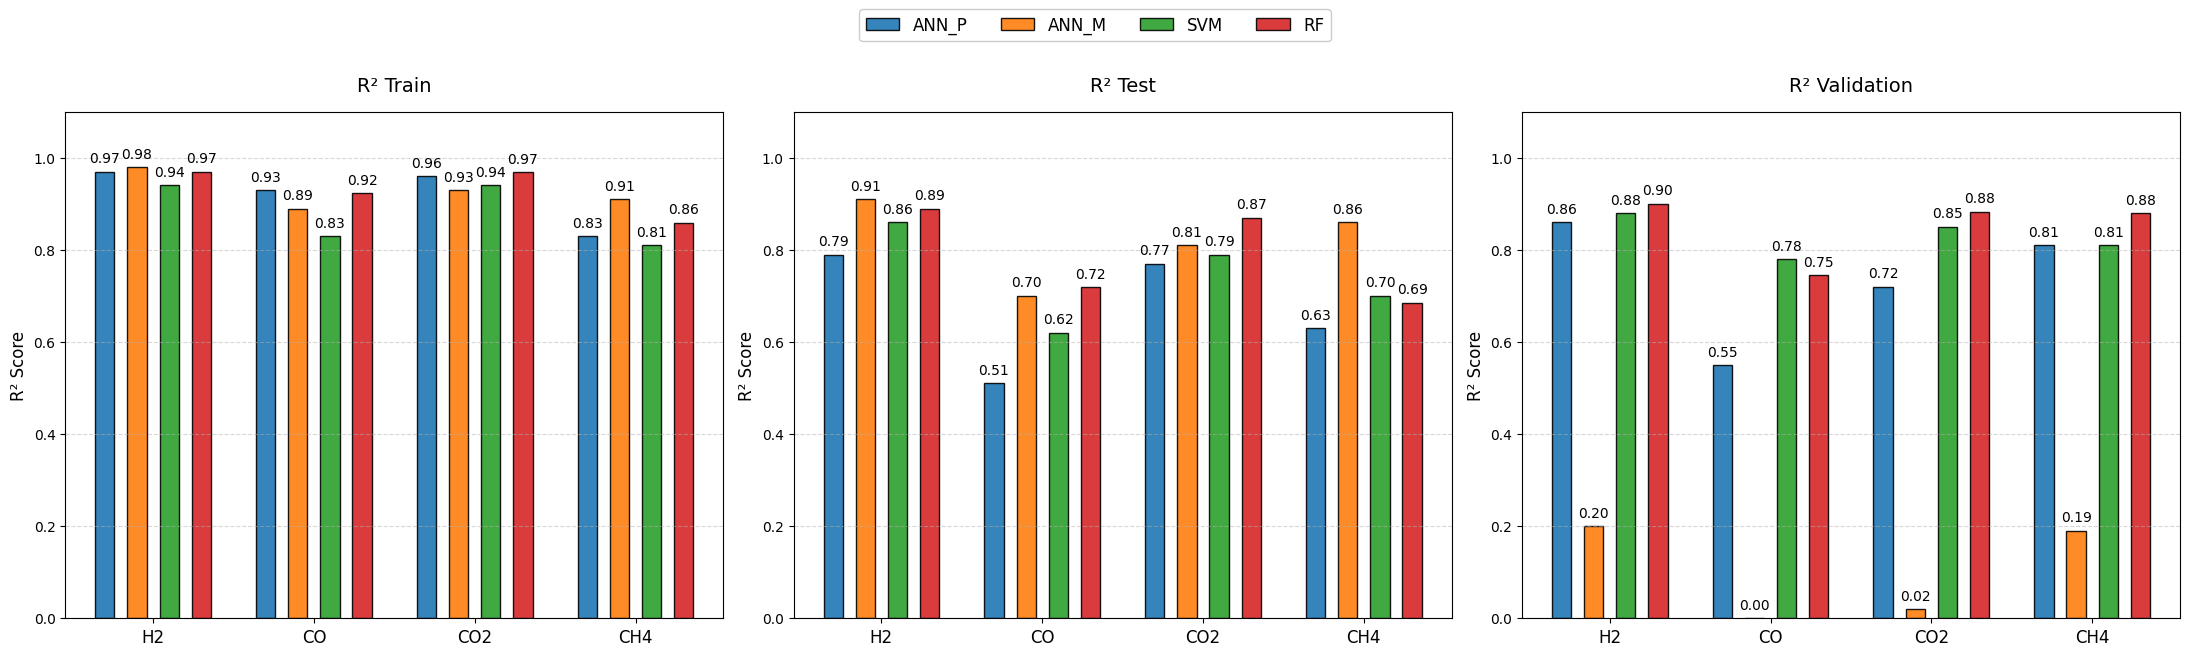

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Configurações
components = ["H2", "CO", "CO2", "CH4"]
models = ["ANN_P", "ANN_M", "SVM", "RF"]
metrics = ["R²_Train", "R²_Test", "R²_Validation"]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # Cores para cada modelo

# Criar figura com 3 subplots (uma linha, três colunas)
fig, axs = plt.subplots(1, 3, figsize=(22, 6))
plt.subplots_adjust(wspace=0.4)  # Espaço entre subplots

# Loop para cada métrica (Train, Test, Validation)
for i, metric in enumerate(metrics):
    ax = axs[i]
    total_models = len(models)
    total_components = len(components)

    # Posições no eixo X: espaçamento ampliado entre todas as barras
    x_base = np.arange(total_components) * (total_models + 1)  # Espaço extra entre componentes
    x = []
    for j in range(total_components):
        x.extend(x_base[j] + np.arange(total_models))  # Posições para cada modelo

    width = 0.6  # Largura das barras (ajustada para o espaçamento)

    # Loop para plotar as barras
    for j, model in enumerate(models):
        values = [df[(df["Model"] == model) & (df["Component"] == comp)][metric].values[0] for comp in components]
        pos = x_base + j  # Posição específica para cada modelo
        ax.bar(pos, values, width, color=colors[j], label=model, edgecolor='black', alpha=0.9)

        # Adicionar valores nas barras
        for k, val in enumerate(values):
            ax.text(pos[k], val + 0.02, f"{val:.2f}", ha='center', fontsize=10)

    # Personalização do gráfico
    ax.set_title(metric.replace("_", " "), fontsize=14, pad=15)
    ax.set_xticks(x_base + (total_models - 1) / 2)  # Centralizar ticks nos grupos
    ax.set_xticklabels(components, fontsize=12)
    ax.set_ylim(0, 1.1)
    ax.set_ylabel("R² Score", fontsize=12)
    ax.grid(axis='y', linestyle='--', alpha=0.5)

# Legenda única (centralizada acima)
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.1),
           ncol=len(models), fontsize=12, framealpha=1)

plt.tight_layout()
plt.show()

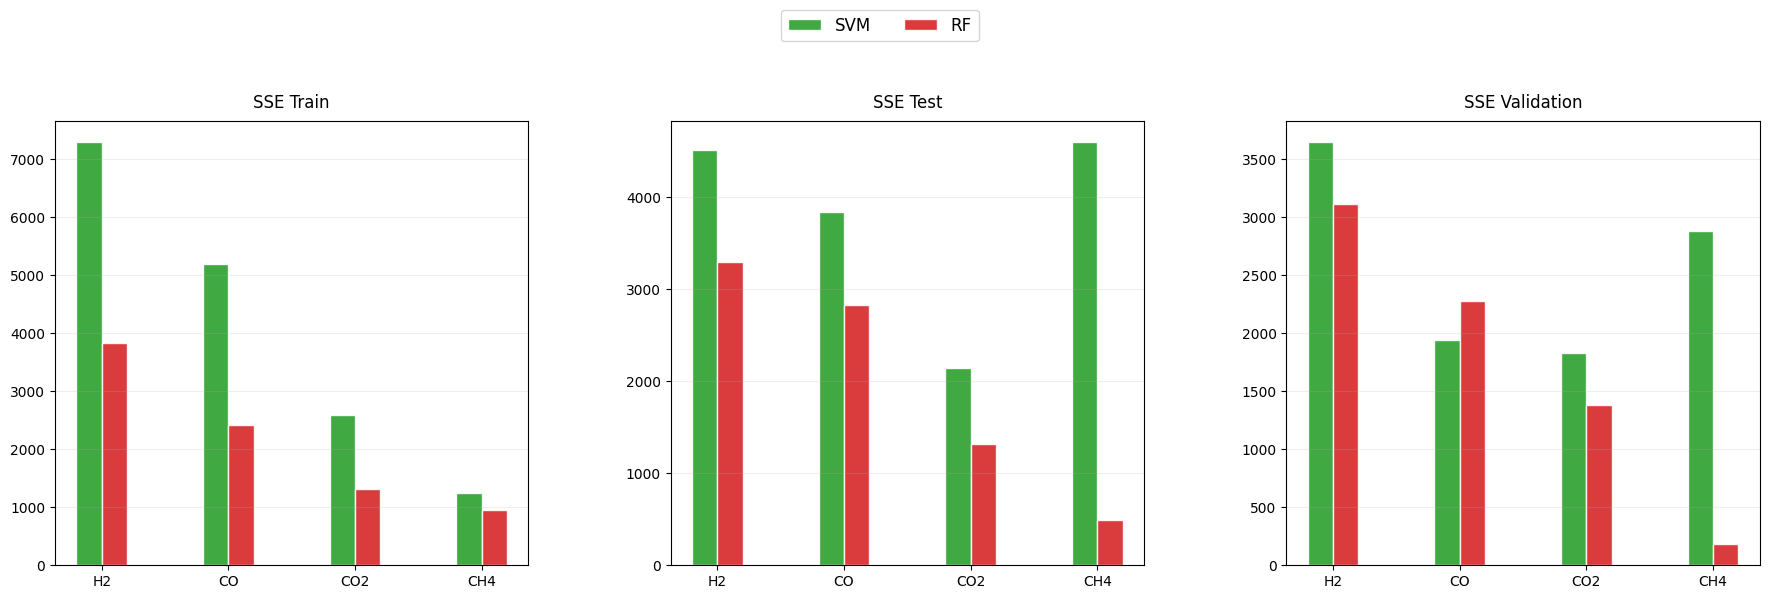

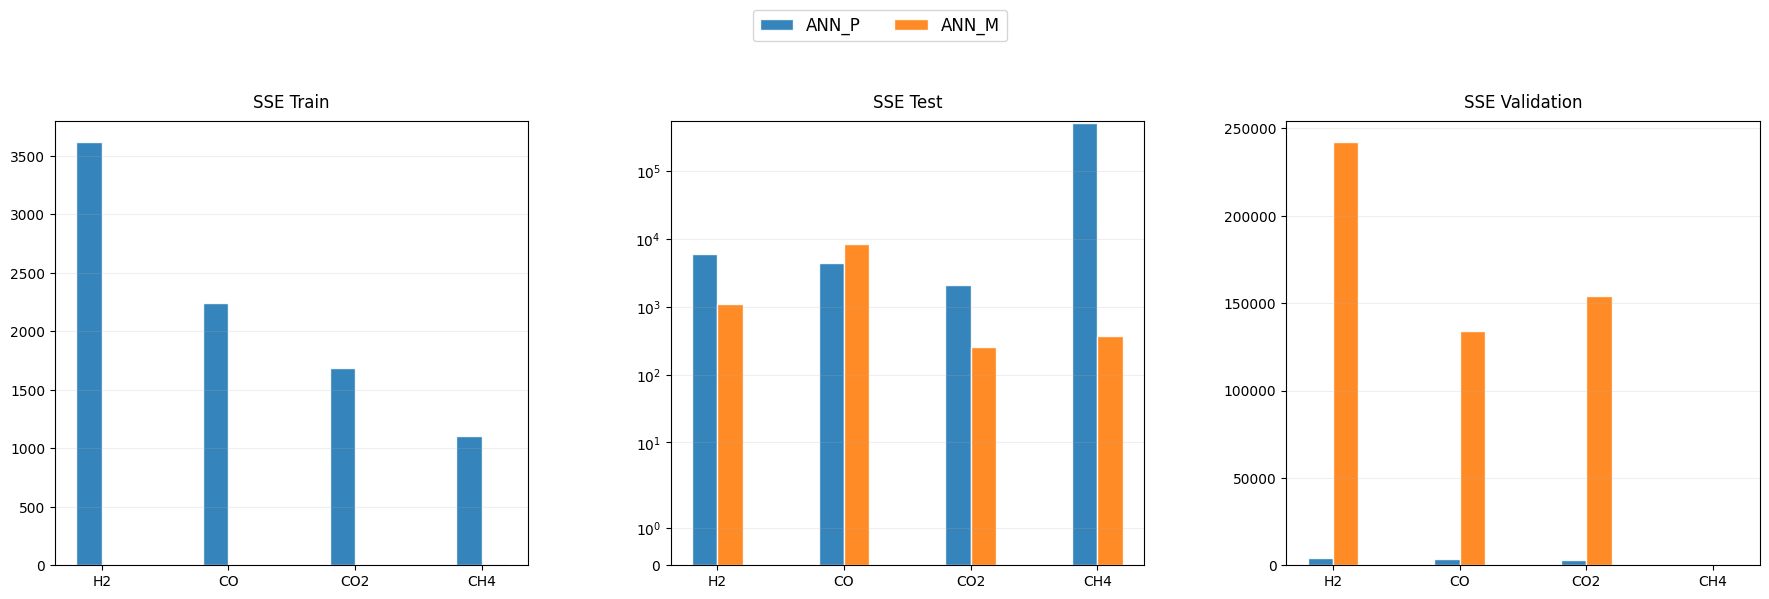

In [64]:
import matplotlib.pyplot as plt
import numpy as np

# Configurações
metrics = ["SSE_Train", "SSE_Test", "SSE_Validation"]
components = ["H2", "CO", "CO2", "CH4"]
model_groups = {
    "SVM e RF": ["SVM", "RF"],
    "ANN_P e ANN_M": ["ANN_P", "ANN_M"]
}
palette = {
    "SVM": "#2ca02c",
    "RF": "#d62728",
    "ANN_P": "#1f77b4",
    "ANN_M": "#ff7f0e"
}


# Criar gráficos para cada grupo
for group_name, models in model_groups.items():
    fig, axs = plt.subplots(1, 3, figsize=(22, 6))
    plt.subplots_adjust(top=0.85, wspace=0.3)

    handles = []  # Armazenar elementos para legenda

    for i, metric in enumerate(metrics):
        ax = axs[i]
        x = np.arange(len(components)) * 2  # Espaço ampliado
        width = 0.4

        for j, model in enumerate(models):
            values = [df[(df["Model"] == model) & (df["Component"] == comp)][metric].values[0]
                       for comp in components]

            bars = ax.bar(x + j*width, values, width, color=palette[model],
                          edgecolor='white', alpha=0.9)


            # Guardar handles apenas no primeiro subplot
            if i == 0:
                handles.append(bars[0])

        ax.set_title(metric.replace("_", " "), pad=10)
        ax.set_xticks(x + width/2)
        ax.set_xticklabels(components)
        ax.grid(axis='y', alpha=0.2)

        # Ajuste de escala para ANNs
        if "ANN" in group_name and metric == "SSE_Test":
            ax.set_yscale('symlog')

    # LEGENDA ÚNICA (apenas uma vez)
    fig.legend(handles, models, loc='upper center',
               ncol=len(models), bbox_to_anchor=(0.5, 1.05),
               fontsize=12, frameon=True)

    plt.show()